In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import os

In [2]:
# Load our dataset
path = 'dataset-football_commentary'
filename = 'qb_mentions_12_topics.csv'

df = pd.read_csv(os.path.join(path, filename))
df.head(3)

,Player,Year,Race,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Mention,Mention_Cleaned
0,Matt Leinart,2006,White,0.066667,0.066667,0.066667,0.066667,0.733330,"['seen', 'a', 'lot,', 'and', 'weve', 'seen', '...","seen a lot, and weve seen him win a lot that s..."
1,Matt Leinart,2006,White,0.050012,0.299917,0.550063,0.050003,0.050004,"['lot', 'that', 's', '<player>', '&gt;&gt;', '...","lot that s and, mike, he has been on top all y..."
2,Matt Leinart,2006,White,0.028589,0.171329,0.600246,0.028584,0.171252,"['all', 'you', 'need', 'to', 'do', 'is', 'look...",all you need to do is look at two simple numbe...


In [3]:
df.insert(3, 'Dominant_Topic', '')
cols = ['Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5']
tmp = df[cols]

for index, row in df.iterrows():
    df.at[index, 'Dominant_Topic'] = tmp.loc[index].idxmax()

df.head(3)

,Player,Year,Race,Dominant_Topic,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Mention,Mention_Cleaned
0,Matt Leinart,2006,White,Topic_5,0.066667,0.066667,0.066667,0.066667,0.733330,"['seen', 'a', 'lot,', 'and', 'weve', 'seen', '...","seen a lot, and weve seen him win a lot that s..."
1,Matt Leinart,2006,White,Topic_3,0.050012,0.299917,0.550063,0.050003,0.050004,"['lot', 'that', 's', '<player>', '&gt;&gt;', '...","lot that s and, mike, he has been on top all y..."
2,Matt Leinart,2006,White,Topic_3,0.028589,0.171329,0.600246,0.028584,0.171252,"['all', 'you', 'need', 'to', 'do', 'is', 'look...",all you need to do is look at two simple numbe...


In [4]:
df = df[['Player', 'Year', 'Race', 'Dominant_Topic', 'Mention_Cleaned']]
df.head(5)

,Player,Year,Race,Dominant_Topic,Mention_Cleaned
0,Matt Leinart,2006,White,Topic_5,"seen a lot, and weve seen him win a lot that s..."
1,Matt Leinart,2006,White,Topic_3,"lot that s and, mike, he has been on top all y..."
2,Matt Leinart,2006,White,Topic_3,all you need to do is look at two simple numbe...
3,Matt Leinart,2006,White,Topic_4,need an offensive line to give him an opportun...
4,Matt Leinart,2006,White,Topic_2,get to eavesdrop on this very tough test again...


In [5]:
# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

def format_output(output_dict):
  
  polarity = "Neutral"

  if(output_dict['compound']>= 0.05):
    polarity = "Positive"

  elif(output_dict['compound']<= -0.05):
    polarity = "Negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

In [6]:
df['Sentiment'] = df['Mention_Cleaned'].apply(predict_sentiment)
df.head(5)

,Player,Year,Race,Dominant_Topic,Mention_Cleaned,Sentiment
0,Matt Leinart,2006,White,Topic_5,"seen a lot, and weve seen him win a lot that s...",Positive
1,Matt Leinart,2006,White,Topic_3,"lot that s and, mike, he has been on top all y...",Positive
2,Matt Leinart,2006,White,Topic_3,all you need to do is look at two simple numbe...,Neutral
3,Matt Leinart,2006,White,Topic_4,need an offensive line to give him an opportun...,Positive
4,Matt Leinart,2006,White,Topic_2,get to eavesdrop on this very tough test again...,Negative


In [7]:
df['Sentiment'].value_counts()

Positive    18231
Neutral      9635
Negative     8705
Name: Sentiment, dtype: int64

In [8]:
df0 = pd.concat([df, pd.get_dummies(df['Sentiment'])], axis=1)[['Player', 'Year', 'Race', 'Dominant_Topic', 'Positive', 'Neutral', 'Negative']]
df1 = pd.DataFrame([[df['Sentiment'].value_counts()[i] for i in range(3)]], columns=['Positive', 'Neutral', 'Negative'])
df1 = df1[['Negative', 'Neutral', 'Positive']]
df1 = df1.div(df1.sum(axis=1), axis=0)
df1

,Negative,Neutral,Positive
0,0.23803,0.26346,0.49851


In [9]:
df2 = df0.groupby('Race').sum(numeric_only=True).reset_index().drop('Year', axis=1)
df2 = pd.concat([df2[['Race']], df2[['Negative', 'Neutral', 'Positive']].div(df2.sum(axis=1, numeric_only=True), axis=0)], axis=1)
df2

,Race,Negative,Neutral,Positive
0,Non-White,0.239684,0.261418,0.498898
1,White,0.237101,0.264608,0.498291


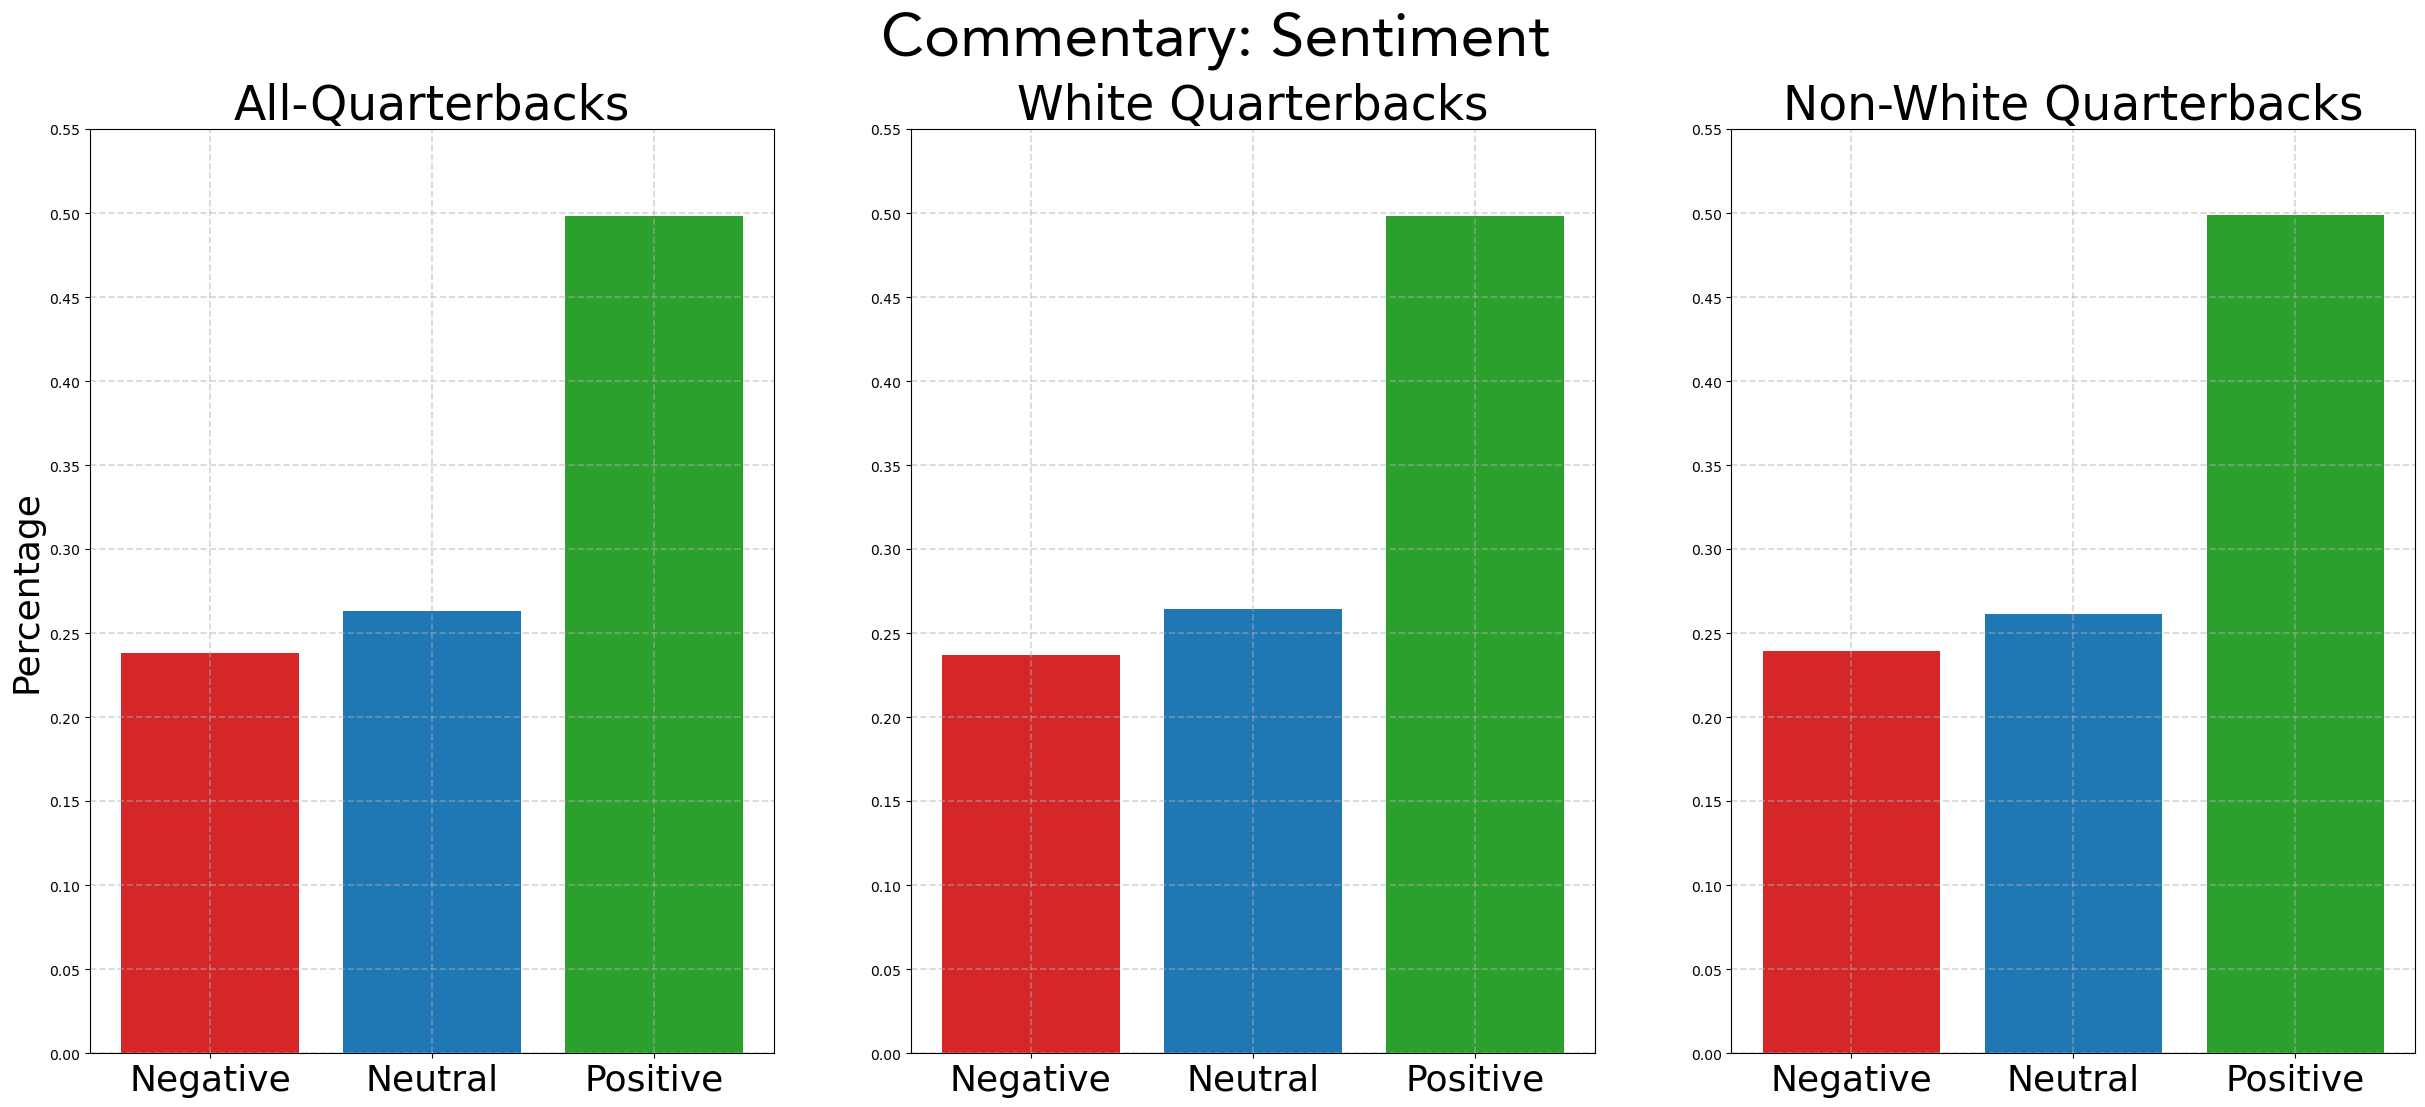

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(30, 12))
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams.update({'font.size': 20})

topics = ['Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5']
topics_ticks = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5']

sents = ['Negative', 'Neutral', 'Positive']

colors_5 = ['tab:purple', 'tab:red', 'tab:green',  'tab:orange', 'tab:blue']
colors_3 = ['tab:red', 'tab:blue', 'tab:green']

yticks = np.arange(0, 0.56, 0.05)
grid_alpha = 0.5
linestyle = '--'
linewidth = 1.25

ax = axs[0]
y = df1.loc[0]
ax.bar(sents, y, color=colors_3)
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title('All-Quarterbacks', fontsize=34)
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=26)
ax.set_ylabel('Percentage', fontsize=26)

ax = axs[1]
y = df2[df2['Race'] == 'White'][sents].reset_index(drop=True).loc[0]
ax.bar(sents, y, color=colors_3)
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title('White Quarterbacks', fontsize=34)
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=26)
ax.set_ylabel('', fontsize=26)

ax = axs[2]
y = df2[df2['Race'] == 'Non-White'][sents].reset_index(drop=True).loc[0]
ax.bar(sents, y, color=colors_3)
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title('Non-White Quarterbacks', fontsize=34)
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=26)
ax.set_ylabel('', fontsize=26)

plt.suptitle('Commentary: Sentiment', fontsize=44)
plt.show()

In [11]:
# Load topics
path = 'dataset-football_commentary'
filename = 'qb_mentions_12_topics.csv'

data = pd.read_csv(os.path.join(path, filename))

In [12]:
data0 = data[['Race', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5']].mean(numeric_only=True)
data1 = pd.DataFrame([[data0[i] for i in range(5)]], columns=['Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5'])
data1

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,0.210746,0.207389,0.163627,0.200276,0.217962


In [13]:
df3 = df0.groupby('Dominant_Topic').sum(numeric_only=True).reset_index().drop('Year', axis=1)
df3 = pd.concat([df3[['Dominant_Topic']], df3[['Negative', 'Neutral', 'Positive']].div(df3.sum(axis=1, numeric_only=True), axis=0)], axis=1)
df3

,Dominant_Topic,Negative,Neutral,Positive
0,Topic_1,0.210625,0.271089,0.518286
1,Topic_2,0.208286,0.235244,0.556470
2,Topic_3,0.248829,0.230436,0.520736
3,Topic_4,0.289761,0.248271,0.461968
4,Topic_5,0.233882,0.314472,0.451646


In [14]:
data2 = data[['Race', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5']].groupby('Race').mean().reset_index()
data2

,Race,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,Non-White,0.211170,0.208032,0.162128,0.201810,0.216860
1,White,0.210507,0.207027,0.164470,0.199414,0.218582


In [15]:
df4 = df0.groupby(['Race', 'Dominant_Topic']).sum(numeric_only=True).reset_index().drop('Year', axis=1)
df4 = pd.concat([df4[['Race', 'Dominant_Topic']], df4[['Negative', 'Neutral', 'Positive']].div(df4.sum(axis=1, numeric_only=True), axis=0)], axis=1).sort_values('Dominant_Topic').reset_index(drop=True)
df4

,Race,Dominant_Topic,Negative,Neutral,Positive
0,Non-White,Topic_1,0.211022,0.267585,0.521392
1,White,Topic_1,0.210393,0.273131,0.516477
2,Non-White,Topic_2,0.219759,0.232205,0.548036
3,White,Topic_2,0.201698,0.236989,0.561313
4,Non-White,Topic_3,0.253208,0.232478,0.514314
5,White,Topic_3,0.246454,0.229328,0.524217
6,Non-White,Topic_4,0.299780,0.246143,0.454078
7,White,Topic_4,0.284077,0.249479,0.466444
8,Non-White,Topic_5,0.219987,0.312784,0.467229
9,White,Topic_5,0.241440,0.315390,0.443170


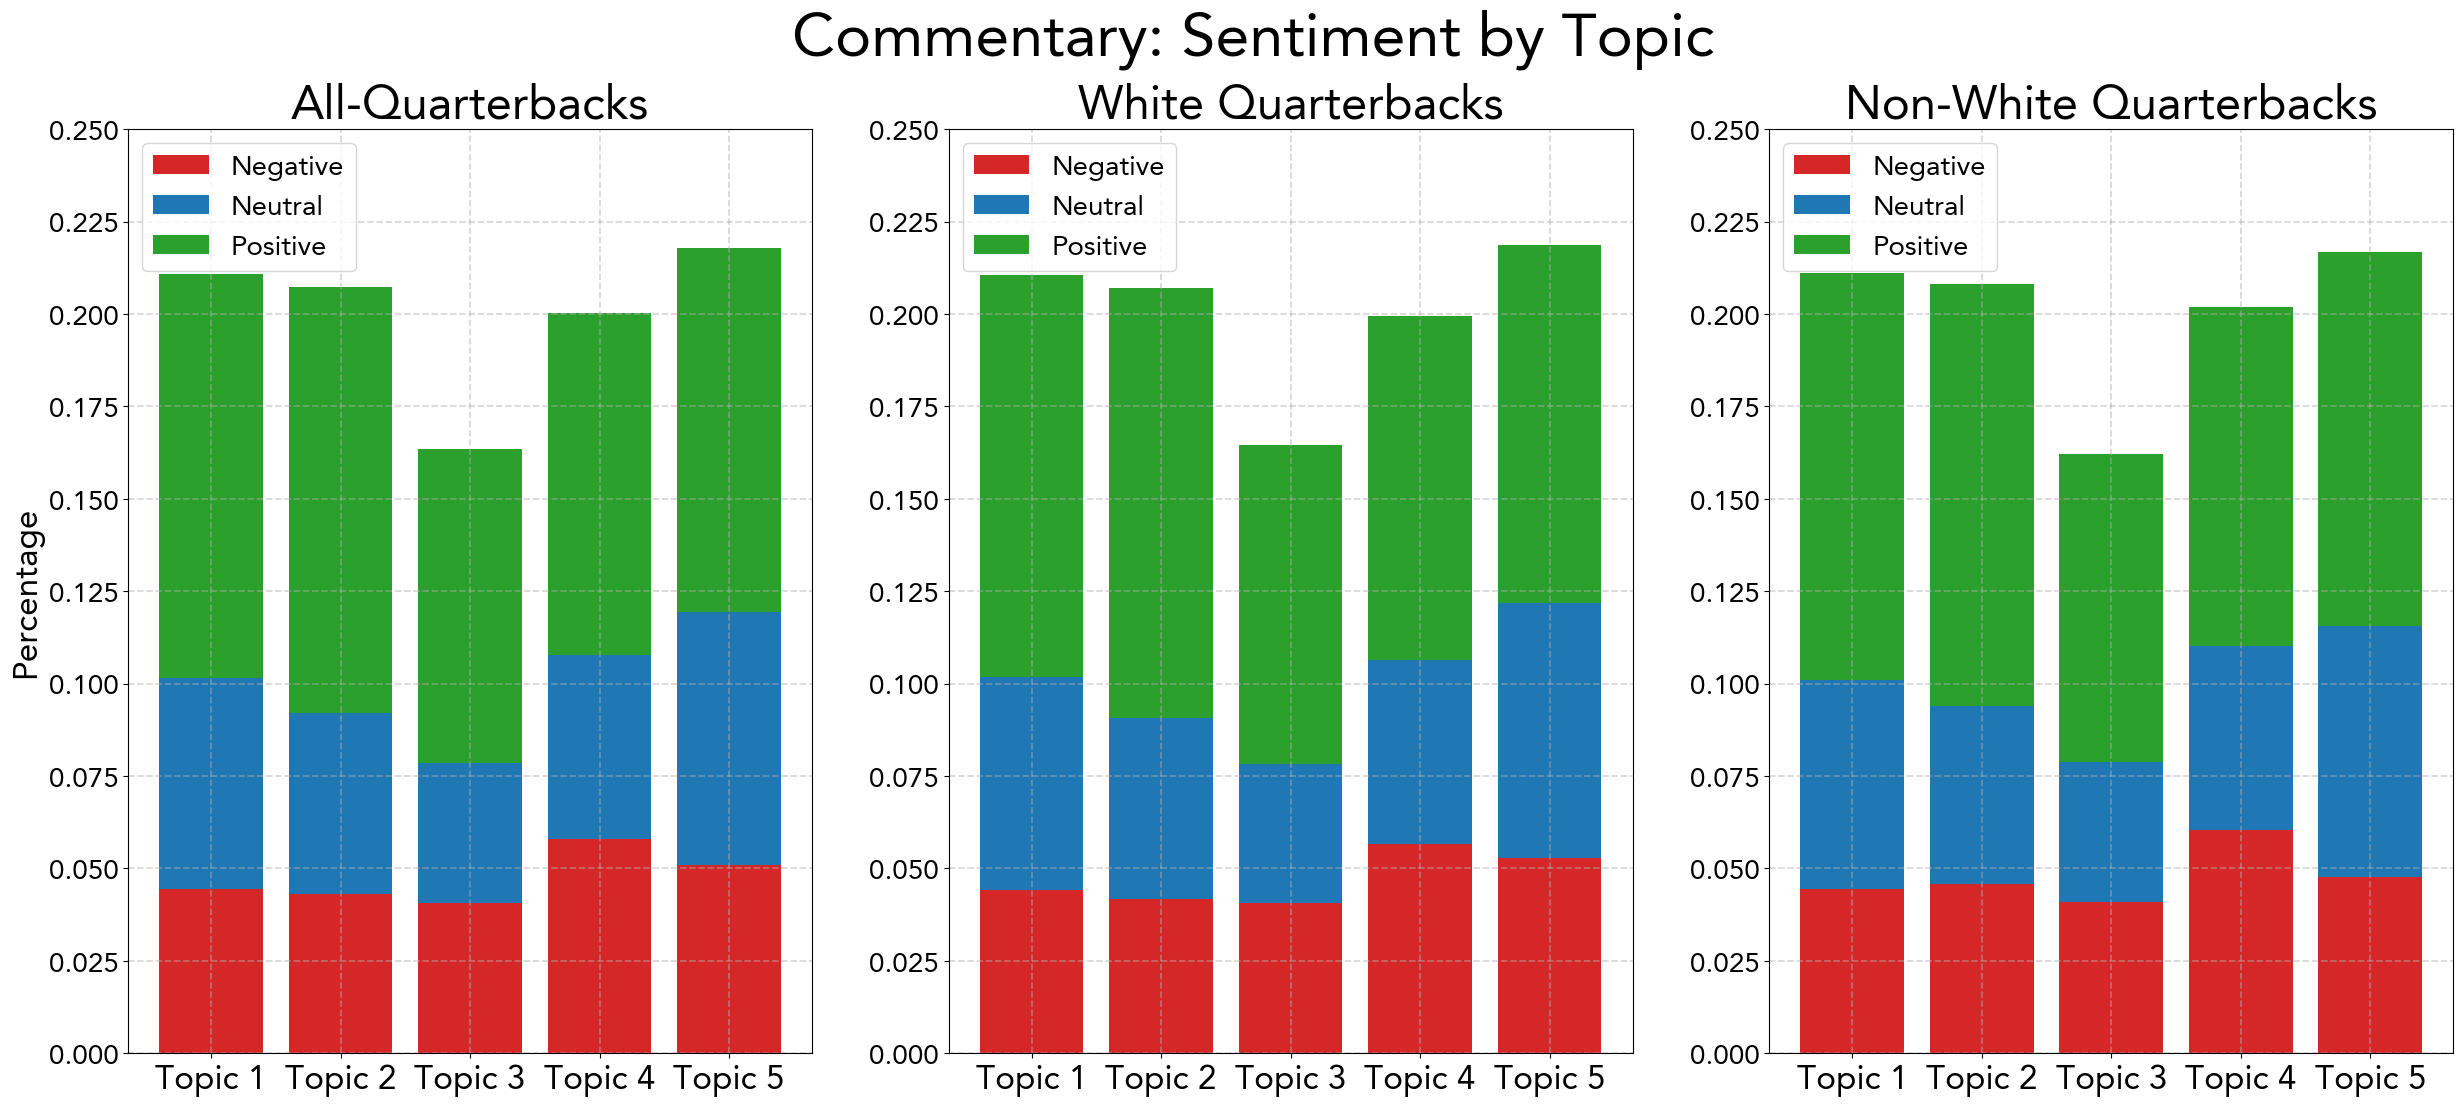

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(30, 12))
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams.update({'font.size': 20})

topics = ['Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5']
x = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5']

sents = ['Negative', 'Neutral', 'Positive']

colors_5 = ['tab:purple', 'tab:red', 'tab:green',  'tab:orange', 'tab:blue']
colors_3 = ['tab:red', 'tab:blue', 'tab:green']

yticks = np.arange(0, 0.26, 0.025)
grid_alpha = 0.5
linestyle = '--'
linewidth = 1.25

ax = axs[0]
y1 = df3['Negative'] * np.array(data1.loc[0])
y2 = df3['Neutral'] * np.array(data1.loc[0])
y3 = df3['Positive'] * np.array(data1.loc[0])
ax.bar(x, y1, color='tab:red', label='Negative')
ax.bar(x, y2, color='tab:blue', bottom=y1, label='Neutral')
ax.bar(x, y3, color='tab:green', bottom=list(map(lambda x, y: x + y, y1, y2)), label='Positive')
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title('All-Quarterbacks', fontsize=34)
ax.legend()
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('Percentage', fontsize=24)

ax = axs[1]
y1 = df4[df4['Race'] == 'White']['Negative'] * np.array(data2[data2['Race'] == 'White'].reset_index(drop=True).loc[0][1:])
y2 = df4[df4['Race'] == 'White']['Neutral'] * np.array(data2[data2['Race'] == 'White'].reset_index(drop=True).loc[0][1:])
y3 = df4[df4['Race'] == 'White']['Positive'] * np.array(data2[data2['Race'] == 'White'].reset_index(drop=True).loc[0][1:])
ax.bar(x, y1, color='tab:red', label='Negative')
ax.bar(x, y2, color='tab:blue', bottom=y1, label='Neutral')
ax.bar(x, y3, color='tab:green', bottom=list(map(lambda x, y: x + y, y1, y2)), label='Positive')
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title('White Quarterbacks', fontsize=34)
ax.legend()
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('', fontsize=24)

ax = axs[2]
y1 = df4[df4['Race'] == 'Non-White']['Negative'] * np.array(data2[data2['Race'] == 'Non-White'].reset_index(drop=True).loc[0][1:])
y2 = df4[df4['Race'] == 'Non-White']['Neutral'] * np.array(data2[data2['Race'] == 'Non-White'].reset_index(drop=True).loc[0][1:])
y3 = df4[df4['Race'] == 'Non-White']['Positive'] * np.array(data2[data2['Race'] == 'Non-White'].reset_index(drop=True).loc[0][1:])
ax.bar(x, y1, color='tab:red', label='Negative')
ax.bar(x, y2, color='tab:blue', bottom=y1, label='Neutral')
ax.bar(x, y3, color='tab:green', bottom=list(map(lambda x, y: x + y, y1, y2)), label='Positive')
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title('Non-White Quarterbacks', fontsize=34)
ax.legend()
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('', fontsize=24)

plt.suptitle('Commentary: Sentiment by Topic', fontsize=44)
plt.show()

In [17]:
df0.insert(2, 'Period', '')

for index, row in df0.iterrows():
    if row['Year'] <= 2011:
        df0.at[index, 'Period'] = '2007-2011'
    elif row['Year'] >= 2017:
        df0.at[index, 'Period'] = '2017-2021'
    else:
        df0.at[index, 'Period'] = '2012-2016'

df0.head(3)

,Player,Year,Period,Race,Dominant_Topic,Positive,Neutral,Negative
0,Matt Leinart,2006,2007-2011,White,Topic_5,1,0,0
1,Matt Leinart,2006,2007-2011,White,Topic_3,1,0,0
2,Matt Leinart,2006,2007-2011,White,Topic_3,0,1,0


In [18]:
df5 = df0.groupby('Period').sum(numeric_only=True).reset_index().drop('Year', axis=1)
df5 = pd.concat([df5[['Period']], df5[['Negative', 'Neutral', 'Positive']].div(df5.sum(axis=1, numeric_only=True), axis=0)], axis=1)
df5

,Period,Negative,Neutral,Positive
0,2007-2011,0.238254,0.271970,0.489776
1,2012-2016,0.243953,0.257416,0.498631
2,2017-2021,0.202346,0.255458,0.542196


In [19]:
df6 = df0.groupby(['Race', 'Period']).sum(numeric_only=True).reset_index().drop('Year', axis=1).sort_values('Period').reset_index(drop=True)
df6 = pd.concat([df6[['Race', 'Period']], df6[['Negative', 'Neutral', 'Positive']].div(df6.sum(axis=1, numeric_only=True), axis=0)], axis=1)
df6

,Race,Period,Negative,Neutral,Positive
0,Non-White,2007-2011,0.248038,0.266562,0.485400
1,White,2007-2011,0.235744,0.273357,0.490899
2,Non-White,2012-2016,0.243993,0.256878,0.499129
3,White,2012-2016,0.243916,0.257915,0.498169
4,Non-White,2017-2021,0.192789,0.278146,0.529065
5,White,2017-2021,0.209942,0.237427,0.552632


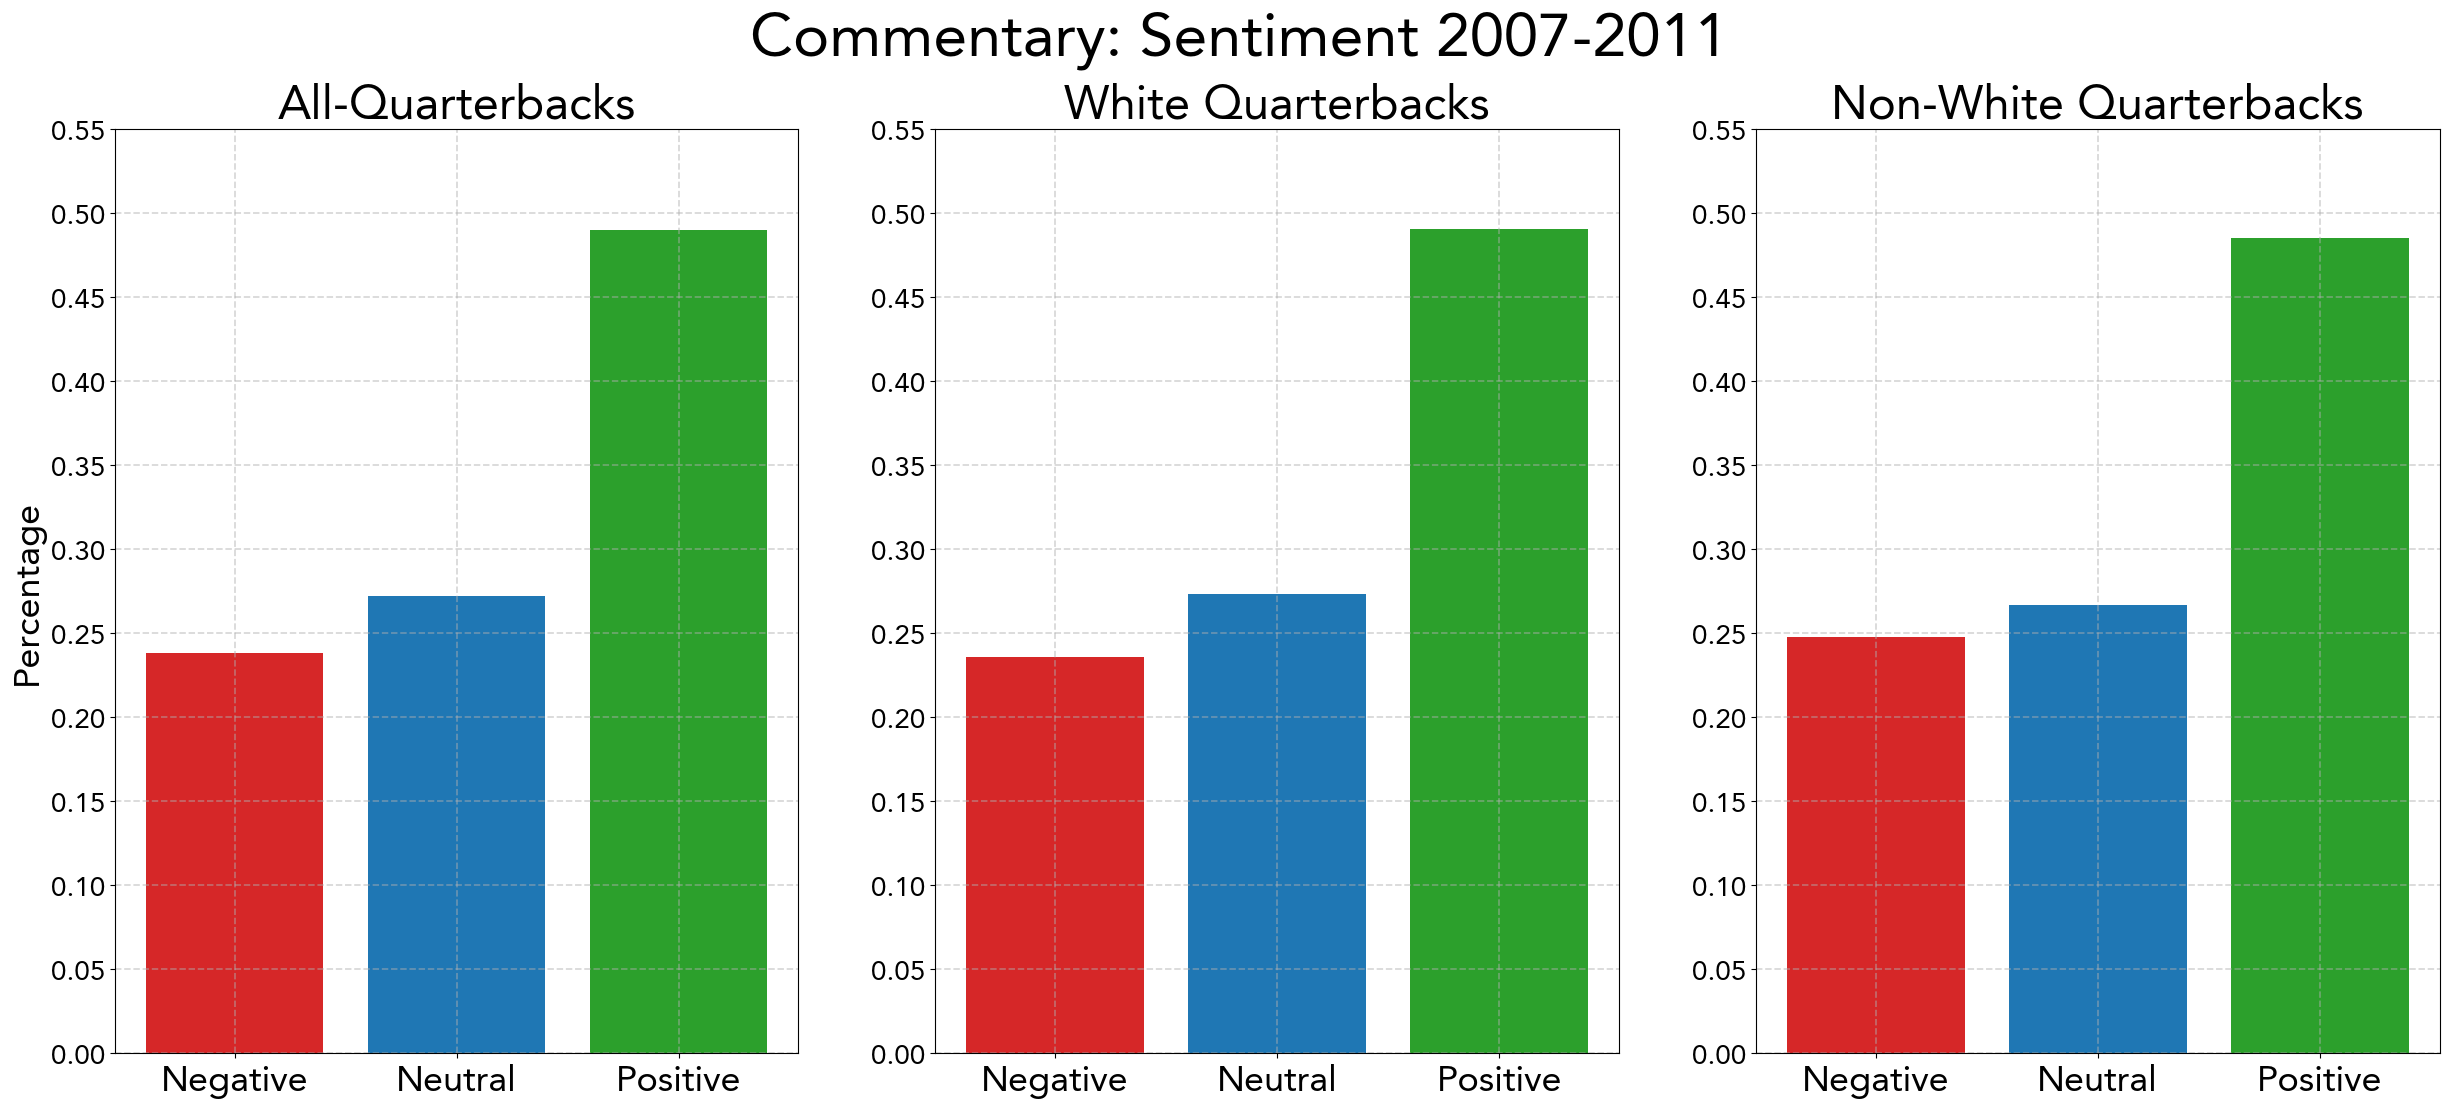

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(30, 12))
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams.update({'font.size': 20})

period = '2007-2011'
x = ['Negative', 'Neutral', 'Positive']
colors = ['tab:red', 'tab:blue', 'tab:green']

yticks = np.arange(0, 0.56, 0.05)
grid_alpha = 0.5
linestyle = '--'
linewidth = 1.25

ax = axs[0]
y = df5[df5['Period'] == period][x].reset_index(drop=True).loc[0]
ax.bar(x, y, color=colors)
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'All-Quarterbacks', fontsize=34)
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=26)
ax.set_ylabel('Percentage', fontsize=26)

ax = axs[1]
y = df6[(df6['Race'] == 'White') & (df6['Period'] == period)][x].reset_index(drop=True).loc[0]
ax.bar(x, y, color=colors)
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'White Quarterbacks', fontsize=34)
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=26)
ax.set_ylabel('', fontsize=26)

ax = axs[2]
y = df6[(df6['Race'] == 'Non-White') & (df6['Period'] == period)][x].reset_index(drop=True).loc[0]
ax.bar(x, y, color=colors)
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'Non-White Quarterbacks', fontsize=34)
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=26)
ax.set_ylabel('', fontsize=26)

plt.suptitle(f'Commentary: Sentiment {period}', fontsize=44)
plt.show()

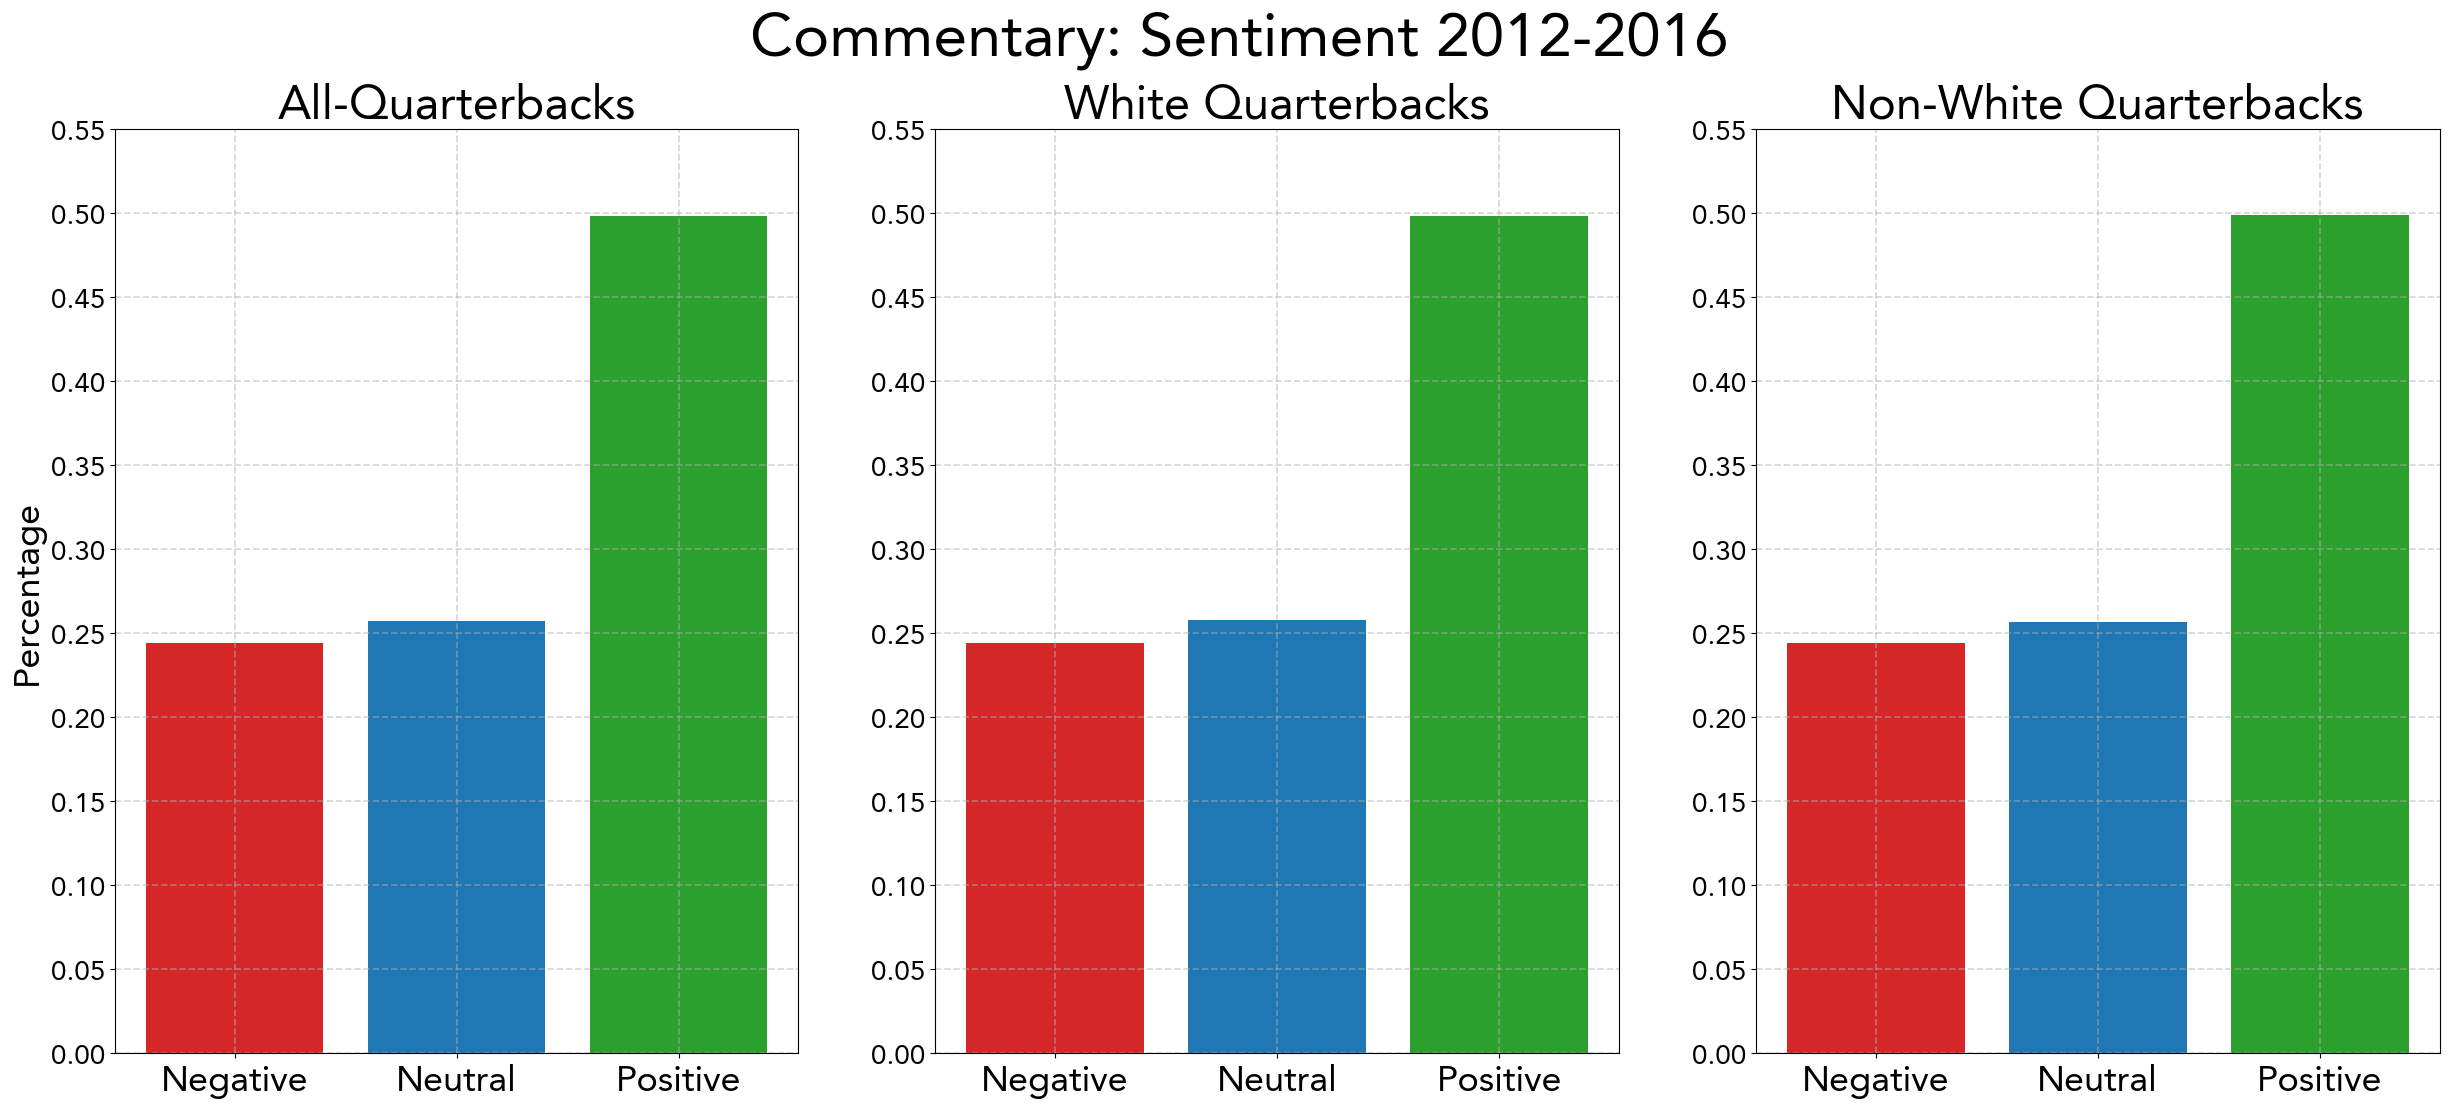

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(30, 12))
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams.update({'font.size': 20})

period = '2012-2016'
x = ['Negative', 'Neutral', 'Positive']
colors = ['tab:red', 'tab:blue', 'tab:green']

yticks = np.arange(0, 0.56, 0.05)
grid_alpha = 0.5
linestyle = '--'
linewidth = 1.25

ax = axs[0]
y = df5[df5['Period'] == period][x].reset_index(drop=True).loc[0]
ax.bar(x, y, color=colors)
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'All-Quarterbacks', fontsize=34)
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=26)
ax.set_ylabel('Percentage', fontsize=26)

ax = axs[1]
y = df6[(df6['Race'] == 'White') & (df6['Period'] == period)][x].reset_index(drop=True).loc[0]
ax.bar(x, y, color=colors)
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'White Quarterbacks', fontsize=34)
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=26)
ax.set_ylabel('', fontsize=26)

ax = axs[2]
y = df6[(df6['Race'] == 'Non-White') & (df6['Period'] == period)][x].reset_index(drop=True).loc[0]
ax.bar(x, y, color=colors)
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'Non-White Quarterbacks', fontsize=34)
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=26)
ax.set_ylabel('', fontsize=26)

plt.suptitle(f'Commentary: Sentiment {period}', fontsize=44)
plt.show()

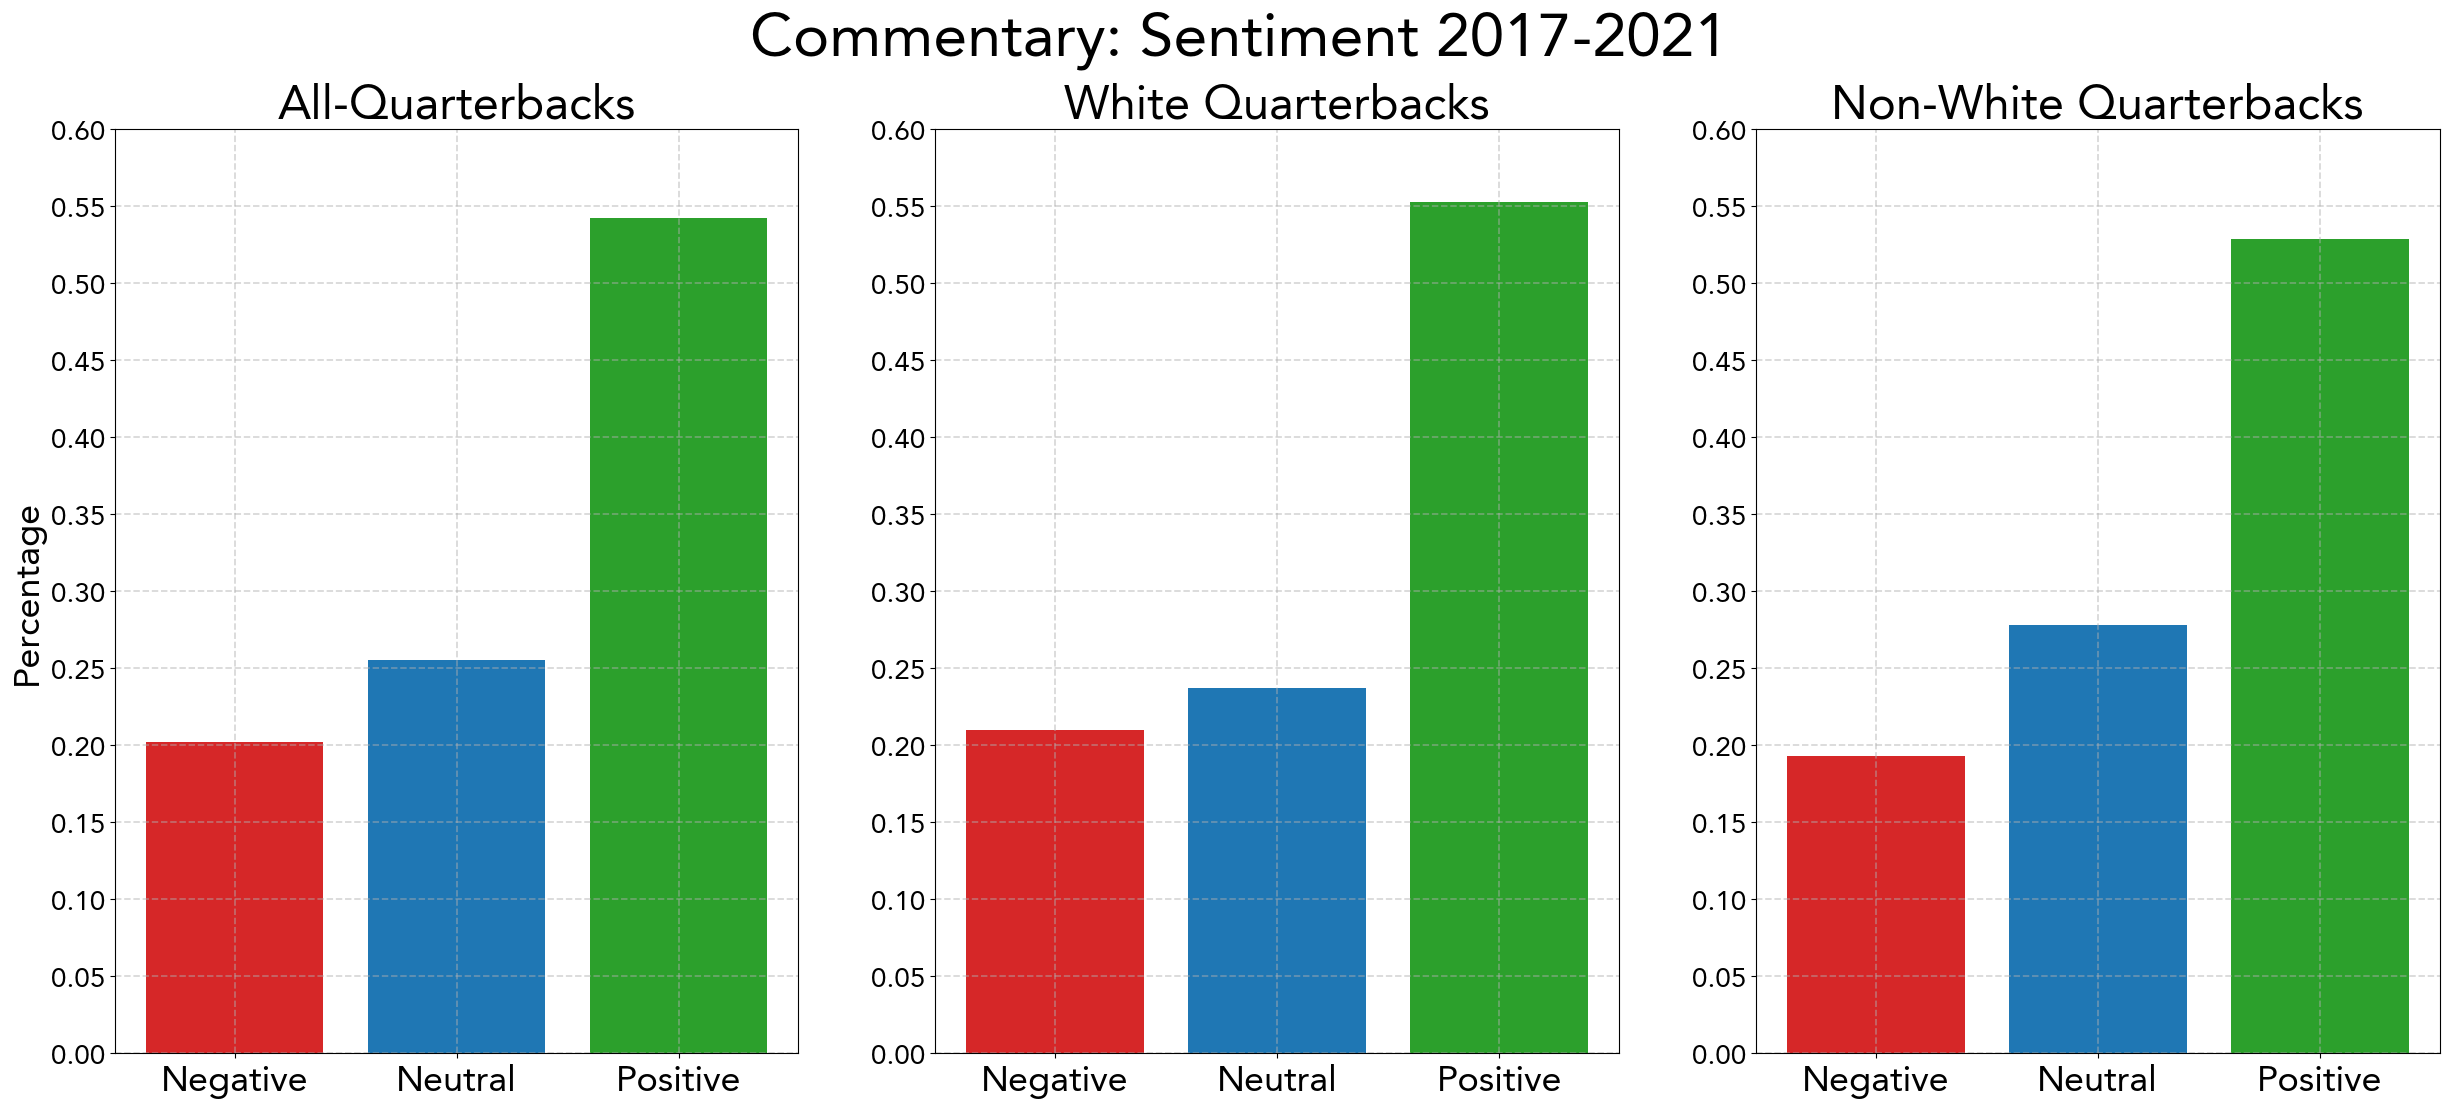

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(30, 12))
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams.update({'font.size': 20})

period = '2017-2021'
x = ['Negative', 'Neutral', 'Positive']
colors = ['tab:red', 'tab:blue', 'tab:green']

yticks = np.arange(0, 0.61, 0.05)
grid_alpha = 0.5
linestyle = '--'
linewidth = 1.25

ax = axs[0]
y = df5[df5['Period'] == period][x].reset_index(drop=True).loc[0]
ax.bar(x, y, color=colors)
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'All-Quarterbacks', fontsize=34)
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=26)
ax.set_ylabel('Percentage', fontsize=26)

ax = axs[1]
y = df6[(df6['Race'] == 'White') & (df6['Period'] == period)][x].reset_index(drop=True).loc[0]
ax.bar(x, y, color=colors)
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'White Quarterbacks', fontsize=34)
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=26)
ax.set_ylabel('', fontsize=26)

ax = axs[2]
y = df6[(df6['Race'] == 'Non-White') & (df6['Period'] == period)][x].reset_index(drop=True).loc[0]
ax.bar(x, y, color=colors)
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'Non-White Quarterbacks', fontsize=34)
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=26)
ax.set_ylabel('', fontsize=26)

plt.suptitle(f'Commentary: Sentiment {period}', fontsize=44)
plt.show()

In [23]:
data3 = data[['Race', 'Year', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5']]
data3.insert(2, 'Period', '')

for index, row in data3.iterrows():
    if row['Year'] <= 2011:
        data3.at[index, 'Period'] = '2007-2011'
    elif row['Year'] >= 2017:
        data3.at[index, 'Period'] = '2017-2021'
    else:
        data3.at[index, 'Period'] = '2012-2016'

In [24]:
data4 = data3.groupby(['Period']).mean(numeric_only=True).reset_index().drop('Year', axis=1)
data4

,Period,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,2007-2011,0.209631,0.205042,0.162263,0.202763,0.220301
1,2012-2016,0.209934,0.209662,0.164089,0.198495,0.217820
2,2017-2021,0.221148,0.206060,0.167864,0.198027,0.206901


In [25]:
data5 = data3.groupby(['Race', 'Period']).mean().reset_index().sort_values(['Period', 'Race']).reset_index(drop=True).drop('Year', axis=1)
data5

,Race,Period,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,Non-White,2007-2011,0.210859,0.201367,0.162709,0.210435,0.214630
1,White,2007-2011,0.209316,0.205985,0.162149,0.200795,0.221756
2,Non-White,2012-2016,0.210815,0.210867,0.161568,0.198784,0.217967
3,White,2012-2016,0.209116,0.208544,0.166429,0.198228,0.217683
4,Non-White,2017-2021,0.214151,0.205682,0.164322,0.200782,0.215062
5,White,2017-2021,0.226709,0.206361,0.170679,0.195837,0.200414


In [26]:
df7 = df0.groupby(['Period', 'Dominant_Topic']).sum(numeric_only=True).reset_index().drop('Year', axis=1).sort_values(['Period', 'Dominant_Topic']).reset_index(drop=True)
df7 = pd.concat([df7[['Period', 'Dominant_Topic']], df7[['Negative', 'Neutral', 'Positive']].div(df7.sum(axis=1, numeric_only=True), axis=0)], axis=1)
df7

,Period,Dominant_Topic,Negative,Neutral,Positive
0,2007-2011,Topic_1,0.210294,0.279129,0.510578
1,2007-2011,Topic_2,0.201907,0.241403,0.556691
2,2007-2011,Topic_3,0.267850,0.226166,0.505984
3,2007-2011,Topic_4,0.278407,0.259418,0.462175
4,2007-2011,Topic_5,0.236282,0.329483,0.434235
5,2012-2016,Topic_1,0.217963,0.264786,0.517251
6,2012-2016,Topic_2,0.214103,0.230310,0.555587
7,2012-2016,Topic_3,0.240198,0.230307,0.529495
8,2012-2016,Topic_4,0.309674,0.240888,0.449438
9,2012-2016,Topic_5,0.237065,0.305738,0.457197


In [27]:
df8 = df0.groupby(['Race', 'Period', 'Dominant_Topic']).sum(numeric_only=True).reset_index().drop('Year', axis=1).sort_values(['Period', 'Dominant_Topic']).reset_index(drop=True)
df8 = pd.concat([df8[['Race', 'Period', 'Dominant_Topic']], df8[['Negative', 'Neutral', 'Positive']].div(df8.sum(axis=1, numeric_only=True), axis=0)], axis=1)
df8

,Race,Period,Dominant_Topic,Negative,Neutral,Positive
0,Non-White,2007-2011,Topic_1,0.236173,0.272048,0.491779
1,White,2007-2011,Topic_1,0.203363,0.281025,0.515612
2,Non-White,2007-2011,Topic_2,0.212544,0.254355,0.533101
3,White,2007-2011,Topic_2,0.199323,0.238256,0.562421
4,Non-White,2007-2011,Topic_3,0.274162,0.222880,0.502959
5,White,2007-2011,Topic_3,0.266180,0.227035,0.506785
6,Non-White,2007-2011,Topic_4,0.295615,0.230552,0.473833
7,White,2007-2011,Topic_4,0.273651,0.267396,0.458952
8,Non-White,2007-2011,Topic_5,0.222527,0.336538,0.440934
9,White,2007-2011,Topic_5,0.239533,0.327816,0.432652


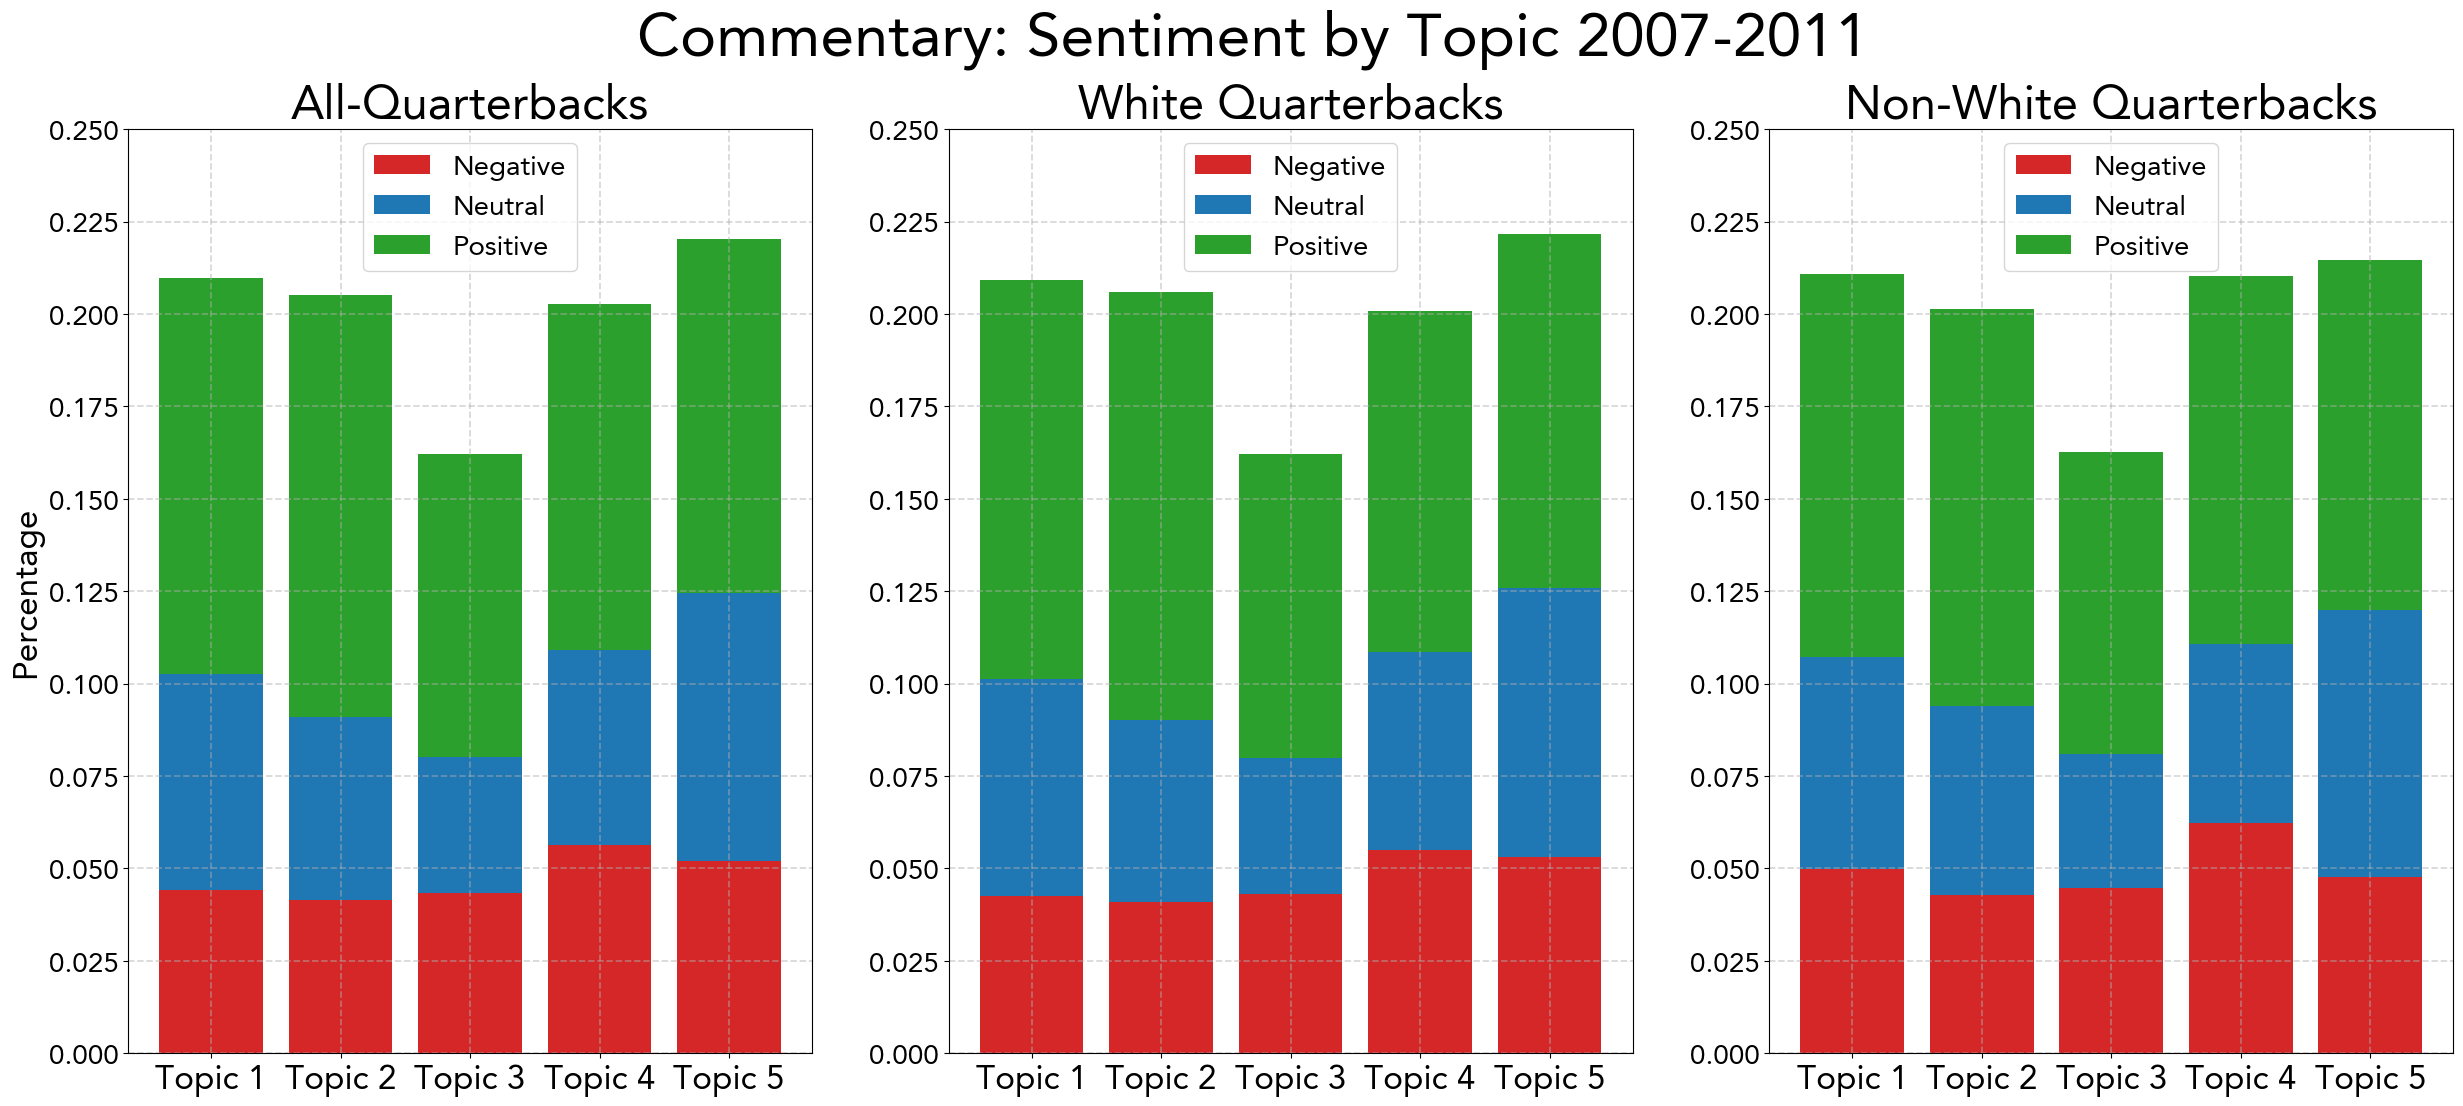

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(30, 12))
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Avenir'

period = '2007-2011'
x = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5']

yticks = np.arange(0, 0.26, 0.025)
grid_alpha = 0.5
linestyle = '--'
linewidth = 1.25

ax = axs[0]
y1 = df7[df7['Period'] == period]['Negative'] * np.array(data4[data4['Period'] == period].reset_index(drop=True).loc[0][1:])
y2 = df7[df7['Period'] == period]['Neutral'] * np.array(data4[data4['Period'] == period].reset_index(drop=True).loc[0][1:])
y3 = df7[df7['Period'] == period]['Positive'] * np.array(data4[data4['Period'] == period].reset_index(drop=True).loc[0][1:])
ax.bar(x, y1, color='tab:red', label='Negative')
ax.bar(x, y2, color='tab:blue', bottom=y1, label='Neutral')
ax.bar(x, y3, color='tab:green', bottom=list(map(lambda x, y: x + y, y1, y2)), label='Positive')
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'All-Quarterbacks', fontsize=34)
ax.legend(loc='upper center')
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('Percentage', fontsize=24)

ax = axs[1]
y1 = df8[(df8['Period'] == period) & (df8['Race'] == 'White')]['Negative'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'White')].reset_index(drop=True).loc[0][2:])
y2 = df8[(df8['Period'] == period) & (df8['Race'] == 'White')]['Neutral'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'White')].reset_index(drop=True).loc[0][2:])
y3 = df8[(df8['Period'] == period) & (df8['Race'] == 'White')]['Positive'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'White')].reset_index(drop=True).loc[0][2:])
ax.bar(x, y1, color='tab:red', label='Negative')
ax.bar(x, y2, color='tab:blue', bottom=y1, label='Neutral')
ax.bar(x, y3, color='tab:green', bottom=list(map(lambda x, y: x + y, y1, y2)), label='Positive')
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'White Quarterbacks', fontsize=34)
ax.legend(loc='upper center')
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('', fontsize=24)

ax = axs[2]
y1 = df8[(df8['Period'] == period) & (df8['Race'] == 'Non-White')]['Negative'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'Non-White')].reset_index(drop=True).loc[0][2:])
y2 = df8[(df8['Period'] == period) & (df8['Race'] == 'Non-White')]['Neutral'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'Non-White')].reset_index(drop=True).loc[0][2:])
y3 = df8[(df8['Period'] == period) & (df8['Race'] == 'Non-White')]['Positive'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'Non-White')].reset_index(drop=True).loc[0][2:])
ax.bar(x, y1, color='tab:red', label='Negative')
ax.bar(x, y2, color='tab:blue', bottom=y1, label='Neutral')
ax.bar(x, y3, color='tab:green', bottom=list(map(lambda x, y: x + y, y1, y2)), label='Positive')
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'Non-White Quarterbacks', fontsize=34)
ax.legend(loc='upper center')
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('', fontsize=24)

plt.suptitle(f'Commentary: Sentiment by Topic {period}', fontsize=44)
plt.show()

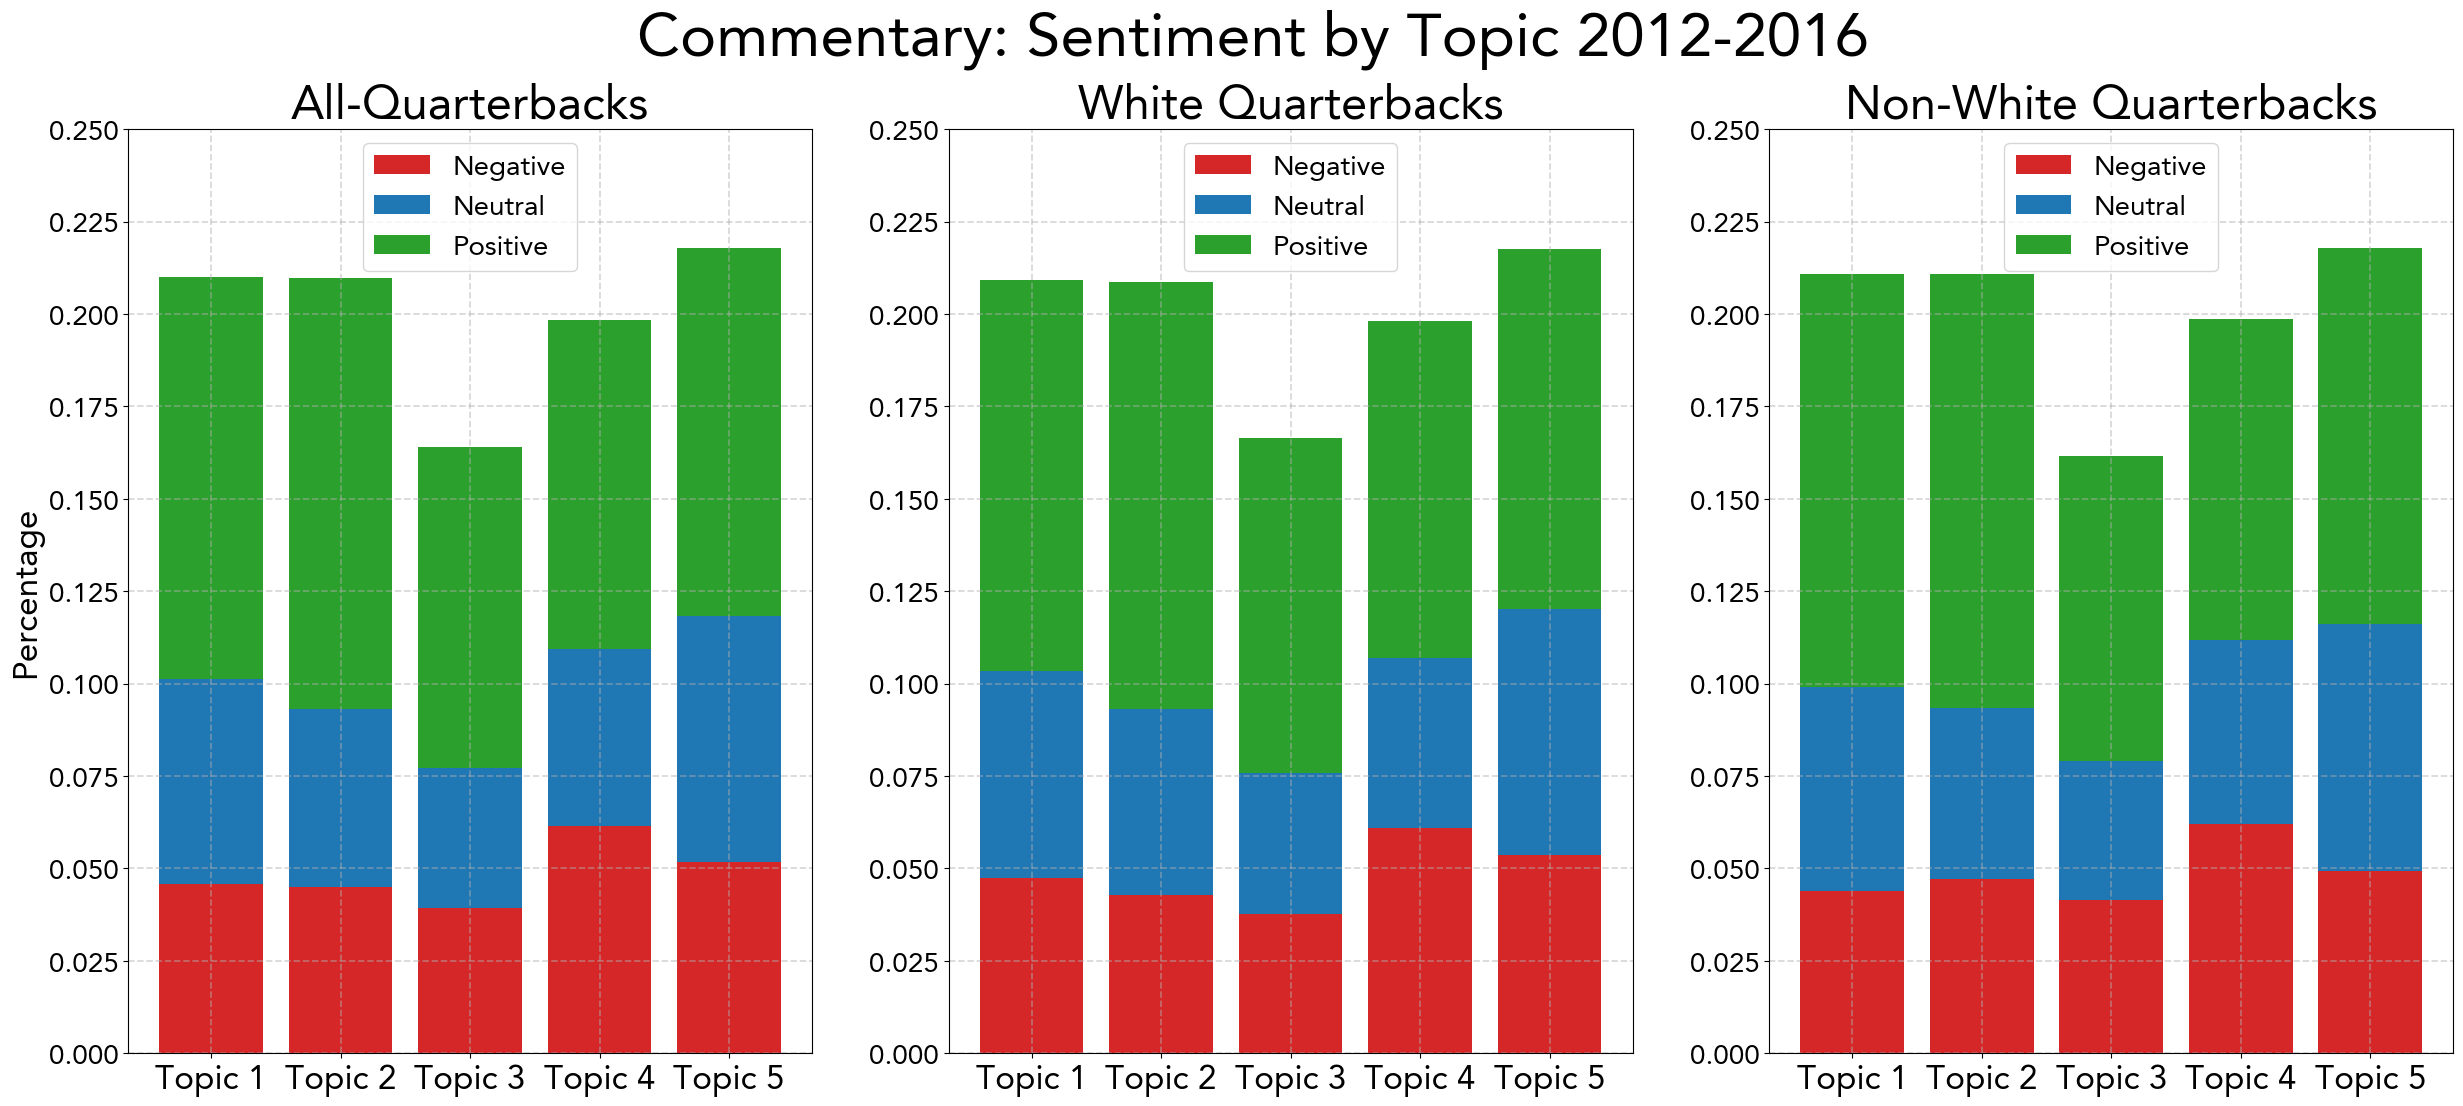

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(30, 12))
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Avenir'

period = '2012-2016'
x = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5']

yticks = np.arange(0, 0.26, 0.025)
grid_alpha = 0.5
linestyle = '--'
linewidth = 1.25

ax = axs[0]
y1 = df7[df7['Period'] == period]['Negative'] * np.array(data4[data4['Period'] == period].reset_index(drop=True).loc[0][1:])
y2 = df7[df7['Period'] == period]['Neutral'] * np.array(data4[data4['Period'] == period].reset_index(drop=True).loc[0][1:])
y3 = df7[df7['Period'] == period]['Positive'] * np.array(data4[data4['Period'] == period].reset_index(drop=True).loc[0][1:])
ax.bar(x, y1, color='tab:red', label='Negative')
ax.bar(x, y2, color='tab:blue', bottom=y1, label='Neutral')
ax.bar(x, y3, color='tab:green', bottom=list(map(lambda x, y: x + y, y1, y2)), label='Positive')
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'All-Quarterbacks', fontsize=34)
ax.legend(loc='upper center')
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('Percentage', fontsize=24)

ax = axs[1]
y1 = df8[(df8['Period'] == period) & (df8['Race'] == 'White')]['Negative'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'White')].reset_index(drop=True).loc[0][2:])
y2 = df8[(df8['Period'] == period) & (df8['Race'] == 'White')]['Neutral'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'White')].reset_index(drop=True).loc[0][2:])
y3 = df8[(df8['Period'] == period) & (df8['Race'] == 'White')]['Positive'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'White')].reset_index(drop=True).loc[0][2:])
ax.bar(x, y1, color='tab:red', label='Negative')
ax.bar(x, y2, color='tab:blue', bottom=y1, label='Neutral')
ax.bar(x, y3, color='tab:green', bottom=list(map(lambda x, y: x + y, y1, y2)), label='Positive')
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'White Quarterbacks', fontsize=34)
ax.legend(loc='upper center')
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('', fontsize=24)

ax = axs[2]
y1 = df8[(df8['Period'] == period) & (df8['Race'] == 'Non-White')]['Negative'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'Non-White')].reset_index(drop=True).loc[0][2:])
y2 = df8[(df8['Period'] == period) & (df8['Race'] == 'Non-White')]['Neutral'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'Non-White')].reset_index(drop=True).loc[0][2:])
y3 = df8[(df8['Period'] == period) & (df8['Race'] == 'Non-White')]['Positive'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'Non-White')].reset_index(drop=True).loc[0][2:])
ax.bar(x, y1, color='tab:red', label='Negative')
ax.bar(x, y2, color='tab:blue', bottom=y1, label='Neutral')
ax.bar(x, y3, color='tab:green', bottom=list(map(lambda x, y: x + y, y1, y2)), label='Positive')
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'Non-White Quarterbacks', fontsize=34)
ax.legend(loc='upper center')
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('', fontsize=24)

plt.suptitle(f'Commentary: Sentiment by Topic {period}', fontsize=44)
plt.show()

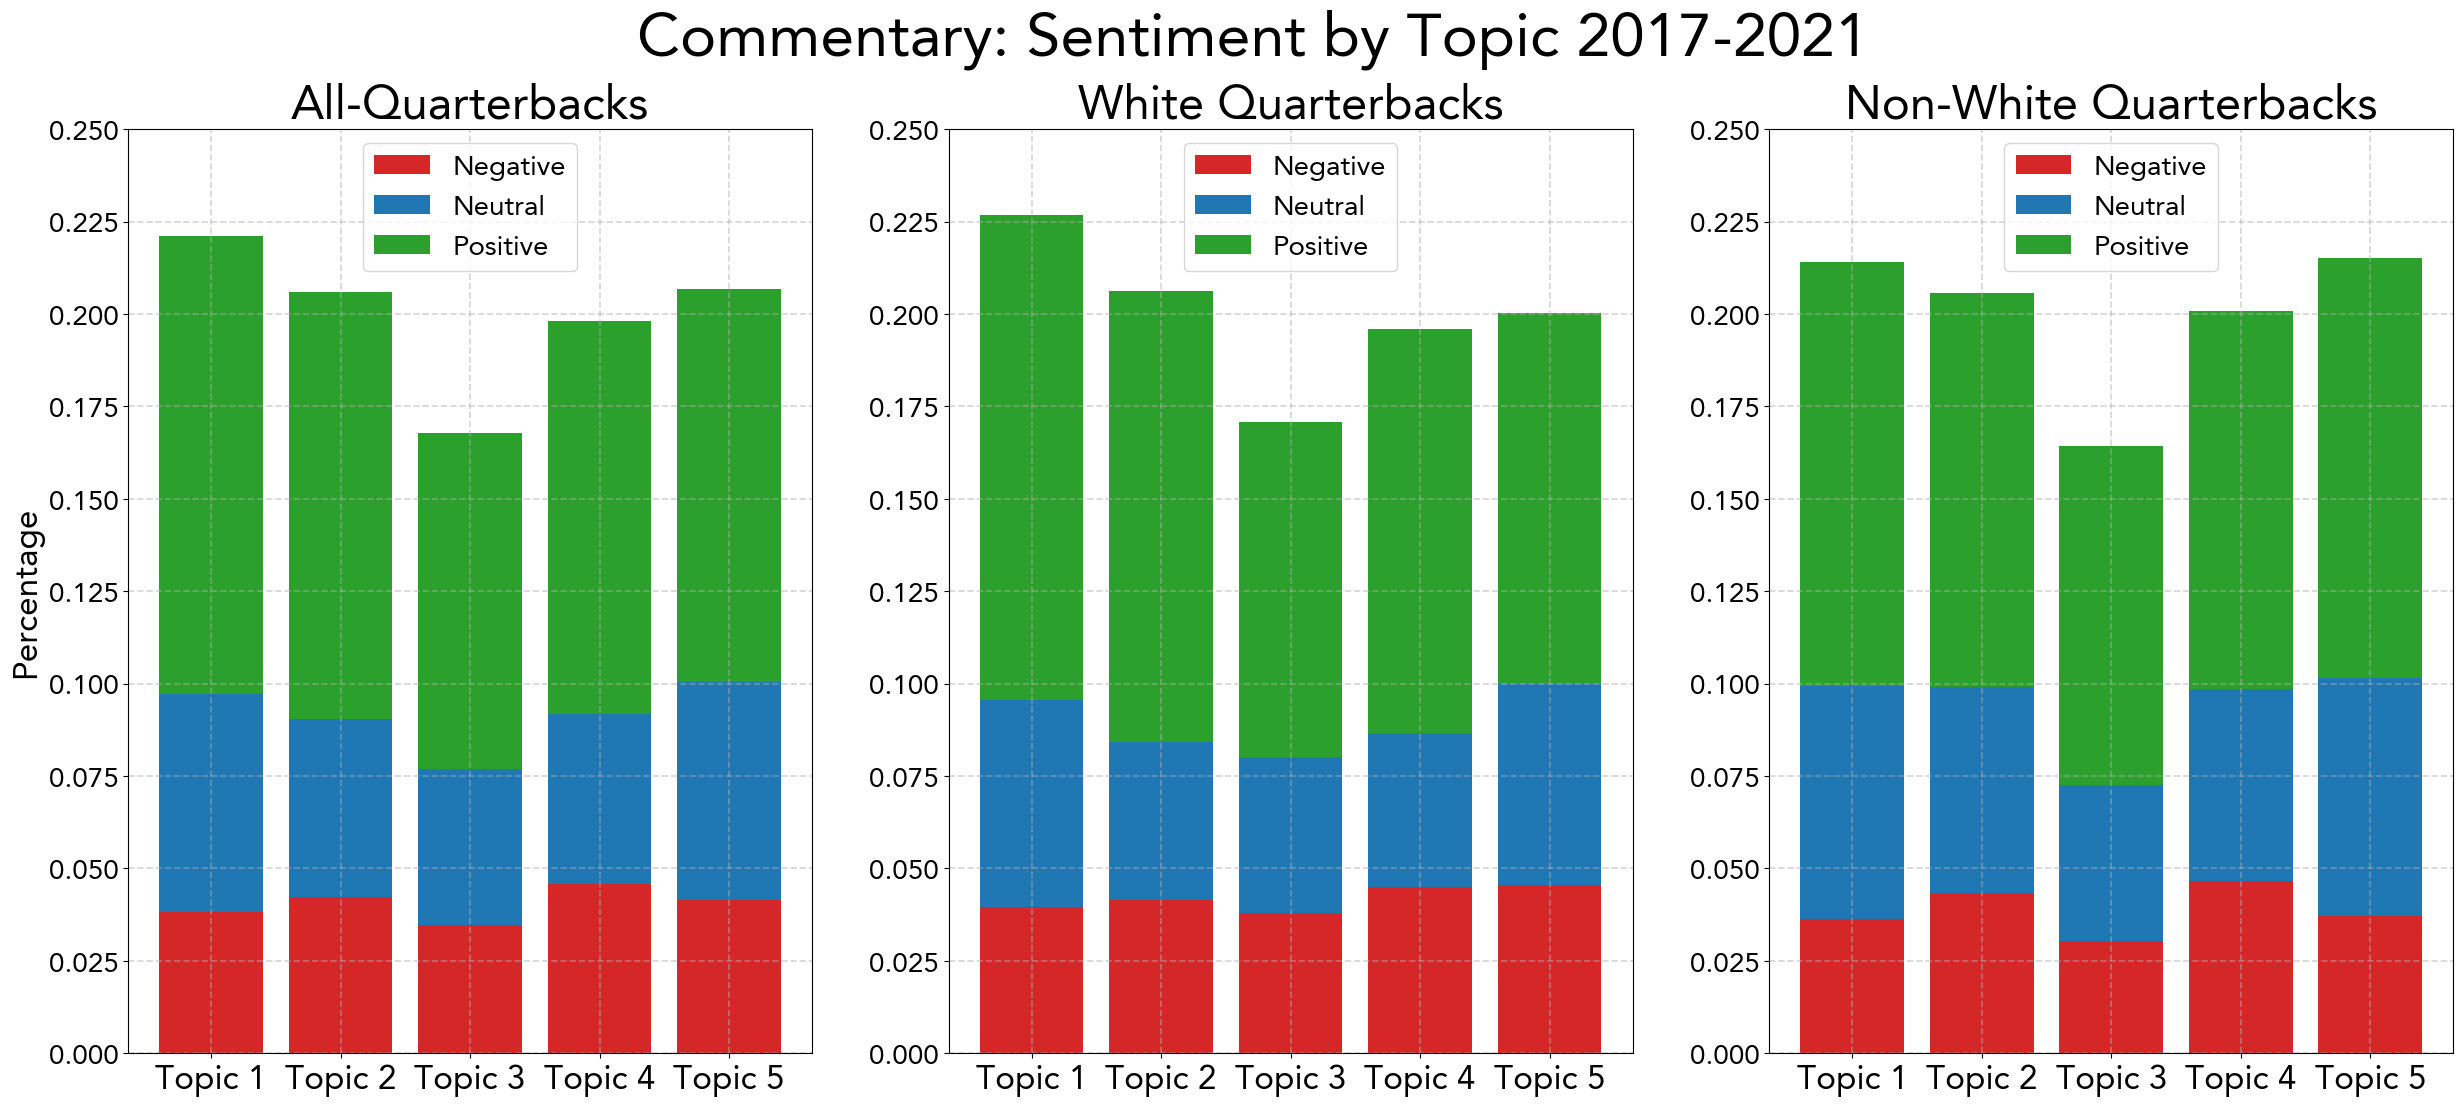

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(30, 12))
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Avenir'

period = '2017-2021'
x = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5']

yticks = np.arange(0, 0.26, 0.025)
grid_alpha = 0.5
linestyle = '--'
linewidth = 1.25

ax = axs[0]
y1 = df7[df7['Period'] == period]['Negative'] * np.array(data4[data4['Period'] == period].reset_index(drop=True).loc[0][1:])
y2 = df7[df7['Period'] == period]['Neutral'] * np.array(data4[data4['Period'] == period].reset_index(drop=True).loc[0][1:])
y3 = df7[df7['Period'] == period]['Positive'] * np.array(data4[data4['Period'] == period].reset_index(drop=True).loc[0][1:])
ax.bar(x, y1, color='tab:red', label='Negative')
ax.bar(x, y2, color='tab:blue', bottom=y1, label='Neutral')
ax.bar(x, y3, color='tab:green', bottom=list(map(lambda x, y: x + y, y1, y2)), label='Positive')
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'All-Quarterbacks', fontsize=34)
ax.legend(loc='upper center')
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('Percentage', fontsize=24)

ax = axs[1]
y1 = df8[(df8['Period'] == period) & (df8['Race'] == 'White')]['Negative'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'White')].reset_index(drop=True).loc[0][2:])
y2 = df8[(df8['Period'] == period) & (df8['Race'] == 'White')]['Neutral'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'White')].reset_index(drop=True).loc[0][2:])
y3 = df8[(df8['Period'] == period) & (df8['Race'] == 'White')]['Positive'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'White')].reset_index(drop=True).loc[0][2:])
ax.bar(x, y1, color='tab:red', label='Negative')
ax.bar(x, y2, color='tab:blue', bottom=y1, label='Neutral')
ax.bar(x, y3, color='tab:green', bottom=list(map(lambda x, y: x + y, y1, y2)), label='Positive')
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'White Quarterbacks', fontsize=34)
ax.legend(loc='upper center')
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('', fontsize=24)

ax = axs[2]
y1 = df8[(df8['Period'] == period) & (df8['Race'] == 'Non-White')]['Negative'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'Non-White')].reset_index(drop=True).loc[0][2:])
y2 = df8[(df8['Period'] == period) & (df8['Race'] == 'Non-White')]['Neutral'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'Non-White')].reset_index(drop=True).loc[0][2:])
y3 = df8[(df8['Period'] == period) & (df8['Race'] == 'Non-White')]['Positive'] * np.array(data5[(data5['Period'] == period) & (data5['Race'] == 'Non-White')].reset_index(drop=True).loc[0][2:])
ax.bar(x, y1, color='tab:red', label='Negative')
ax.bar(x, y2, color='tab:blue', bottom=y1, label='Neutral')
ax.bar(x, y3, color='tab:green', bottom=list(map(lambda x, y: x + y, y1, y2)), label='Positive')
ax.set(ylabel='Percentage', yticks=yticks)
ax.set_title(f'Non-White Quarterbacks', fontsize=34)
ax.legend(loc='upper center')
ax.grid(alpha=grid_alpha, linestyle=linestyle, linewidth=linewidth)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('', fontsize=24)

plt.suptitle(f'Commentary: Sentiment by Topic {period}', fontsize=44)
plt.show()